# <font color=red>Class 09 : Encoding Assignment</font>

## Question:
## Preprocess the housing dataset by encoding all categorical variables using appropriate techniques. Ensure the final dataset is fully numeric and ready for machine learning analysis. y = SalePrice.

In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_excel('house.xlsx')

In [5]:
df.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [10]:
x =  df.drop('Id', axis=1)

In [12]:
y = df.SalePrice

# <font color=red>checking null values</font>

In [14]:
df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

# Measure of Central Tendency

In [15]:
df.LotFrontage.mean()

70.04995836802665

In [16]:
df.LotFrontage.median()

69.0

<Axes: xlabel='LotFrontage', ylabel='Count'>

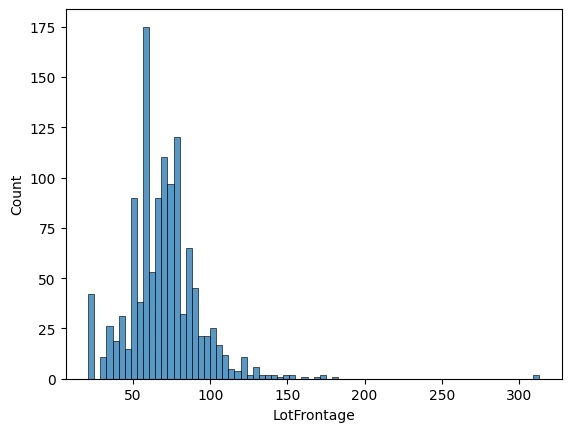

In [17]:
import seaborn as sns
sns.histplot(df.LotFrontage)

In [18]:
mean =df.LotFrontage.mean()
df.LotFrontage = df.LotFrontage.fillna(mean)
df.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 81, dtype: int64

## Copy Data

In [20]:
df1 = df.copy()
df2 = df.copy()
df3 = df.copy()
df4 = df.copy()
df5 = df.copy()
df6 = df.copy()
df7 = df.copy()

# <font color=red>Sklearn Preprocessing</font>
## Some common encoding techniques in machine learning:
1. Label Encoding
2. One-Hot Encoding
3. Binary Encoding
4. Ordinal Encoding
5. Frequency Encoding
7. Mean Encoding
8. Text Embedding

# 1. Label Encoding

In [21]:
df1.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [23]:
df.nunique().to_frame(name='Unique Values').join(df.dtypes.to_frame(name='Data Type'))

,Unique Values,Data Type
Id,1460,int64
MSSubClass,15,int64
MSZoning,5,object
LotFrontage,111,float64
LotArea,1073,int64
...,...,...
MoSold,12,int64
YrSold,5,int64
SaleType,9,object
SaleCondition,6,object


In [24]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [26]:
df1.MSZoning = le.fit_transform(df1['MSZoning'])
df1.MSZoning.unique()

array([3, 4, 0, 1, 2])

# 2. One-Hot Encoding

In [27]:
df2.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [28]:
pd.get_dummies(df2['SaleCondition']).head()
dummy = pd.get_dummies(df2['SaleCondition'], drop_first=True).head()
dummy.head(3)

,AdjLand,Alloca,Family,Normal,Partial
0,False,False,False,True,False
1,False,False,False,True,False
2,False,False,False,True,False


In [29]:
df2.drop('SaleCondition', axis=1, inplace=True)
df2.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2008,WD,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2007,WD,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2008,WD,223500


In [30]:
new_df2 = pd.concat([df2, dummy], axis=1)
new_df2.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,MiscVal,MoSold,YrSold,SaleType,SalePrice,AdjLand,Alloca,Family,Normal,Partial
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,2,2008,WD,208500,False,False,False,True,False
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,5,2007,WD,181500,False,False,False,True,False
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,9,2008,WD,223500,False,False,False,True,False
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,2,2006,WD,140000,False,False,False,False,False
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,12,2008,WD,250000,False,False,False,True,False


# 3. Binary Encoding

In [31]:
df3.head(2)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500


In [32]:
import category_encoders as ce
be = ce.BinaryEncoder(cols=['SaleType'])
be

BinaryEncoder(cols=['SaleType'])

In [33]:
df3_binary_encoded = be.fit_transform(df3)
df3_binary_encoded.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,MiscFeature,MiscVal,MoSold,YrSold,SaleType_0,SaleType_1,SaleType_2,SaleType_3,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,NaN,0,2,2008,0,0,0,1,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,NaN,0,5,2007,0,0,0,1,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,NaN,0,9,2008,0,0,0,1,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,NaN,0,2,2006,0,0,0,1,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,NaN,0,12,2008,0,0,0,1,Normal,250000


# 4. Ordinal Encoding

In [34]:
from sklearn.preprocessing import OrdinalEncoder
df4.head(4)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000


In [40]:
df4.SaleCondition.unique()

array(['Normal', 'Abnorml', 'Partial', 'AdjLand', 'Alloca', 'Family'],
      dtype=object)

In [39]:
ordinal = OrdinalEncoder(categories = [['Normal', 'Abnorml', 'Partial', 'AdjLand', 'Alloca', 'Family']])
ordinal

OrdinalEncoder(categories=[['Normal', 'Abnorml', 'Partial', 'AdjLand', 'Alloca',
                            'Family']])

In [41]:
df4.Area = ordinal.fit_transform(df5[['SaleCondition']])
df4.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# 5. Frequency Encoding

In [47]:
df5.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [49]:
frequency_encoding = df5['LotArea'].value_counts().to_dict()
frequency_encoding

{7200: 25,
 9600: 24,
 6000: 17,
 9000: 14,
 8400: 14,
 10800: 14,
 1680: 10,
 7500: 9,
 9100: 8,
 8125: 8,
 6120: 8,
 6240: 8,
 3182: 7,
 7800: 6,
 8450: 6,
 4435: 5,
 10140: 5,
 10000: 5,
 5000: 5,
 4500: 5,
 9750: 5,
 5400: 5,
 10400: 5,
 9900: 4,
 13125: 4,
 6600: 4,
 8800: 4,
 8640: 4,
 9375: 4,
 7000: 4,
 8750: 4,
 7018: 4,
 11250: 4,
 8520: 4,
 10625: 4,
 8544: 4,
 8500: 4,
 11700: 4,
 9120: 3,
 8000: 3,
 11600: 3,
 9084: 3,
 6762: 3,
 7750: 3,
 12090: 3,
 8012: 3,
 3675: 3,
 13891: 3,
 10200: 3,
 8777: 3,
 14115: 3,
 10440: 3,
 2280: 3,
 2117: 3,
 2522: 3,
 10500: 3,
 9920: 3,
 9200: 3,
 8712: 3,
 4426: 3,
 7875: 3,
 11500: 3,
 9400: 2,
 1533: 2,
 9760: 2,
 15611: 2,
 9819: 2,
 5500: 2,
 11340: 2,
 14000: 2,
 13500: 2,
 12342: 2,
 14803: 2,
 12000: 2,
 9060: 2,
 9786: 2,
 8773: 2,
 10410: 2,
 7917: 2,
 10125: 2,
 8814: 2,
 9842: 2,
 4438: 2,
 9350: 2,
 10762: 2,
 8250: 2,
 11475: 2,
 10120: 2,
 4060: 2,
 8760: 2,
 12160: 2,
 11275: 2,
 8877: 2,
 13600: 2,
 8248: 2,
 9020: 2,
 1

In [50]:
df['Area_Frequency_Encoded'] = df['LotArea'].map(frequency_encoding)
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Area_Frequency_Encoded
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2008,WD,Normal,208500,6
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,5,2007,WD,Normal,181500,24
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,9,2008,WD,Normal,223500,4
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000,1
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,12,2008,WD,Normal,250000,1


# 6. Mean Encoding

In [42]:
df6.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [43]:
mean_encoded_area = df6.groupby('SaleCondition')['SalePrice'].mean().to_dict()
mean_encoded_area

{'Abnorml': 146526.62376237623,
 'AdjLand': 104125.0,
 'Alloca': 167377.41666666666,
 'Family': 149600.0,
 'Normal': 175202.21953255427,
 'Partial': 272291.752}

In [45]:
unique_sale = df6['SaleCondition'].unique()
unique_sale

array(['Normal', 'Abnorml', 'Partial', 'AdjLand', 'Alloca', 'Family'],
      dtype=object)

In [46]:
df7['SaleCondition'] = df6['SaleCondition'].map(mean_encoded_area)
df7.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,175202.219533,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,175202.219533,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,175202.219533,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,146526.623762,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,175202.219533,250000
